In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # deluxe visualization library
import matplotlib.pyplot as plt # visualization library to support seaborn
%matplotlib inline

In [ ]:


# importing dataset from persistent landing
thyroidDF = pd.read_csv('/content/drive/MyDrive/MINI Project/thyroidDF.csv') # thyroidDF.csv

# dropping redundant attributes from thyroidDF dataset
thyroidDF.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 
                'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}
thyroidDF['target'] = thyroidDF['target'].map(diagnoses) # re-mapping

thyroidDF.dropna(subset=['target'], inplace=True) 

# dataset initial summary
thyroidDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

In [ ]:
# distributions of numeric variables
thyroidDF.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


In [ ]:
# inspecting observations with age > 100
thyroidDF[thyroidDF.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [ ]:
# changing age of observations with ('age' > 100) to null
thyroidDF['age'] = np.where((thyroidDF.age > 100), np.nan, thyroidDF.age)

In [ ]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 7.54%


,Total,Percent
TBG,7287,0.965677
T3,2209,0.292738
TSH,722,0.095680
T4U,676,0.089584
FTI,669,0.088656
TT4,354,0.046912
sex,250,0.033130
age,4,0.000530
goitre,0,0.000000
psych,0,0.000000


In [ ]:
# dropping 'TBG' attribute from dataset
thyroidDF.drop(['TBG'], axis=1, inplace=True)

# dropping 4 observations with abnormal 'age' from dataset
thyroidDF.dropna(subset=['age'], inplace=True)

# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
thyroidDF['sex'] = np.where((thyroidDF.sex.isnull()) & (thyroidDF.pregnant == 't'), 'F', thyroidDF.sex)

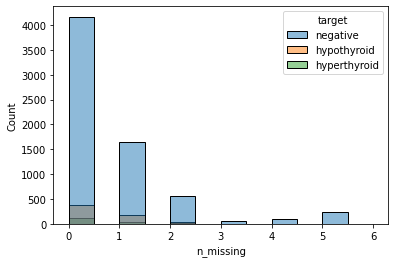

In [ ]:
# count missing values per row
thyroidDF['n_missing'] = thyroidDF.isnull().sum(axis=1)
sns.histplot(thyroidDF, x='n_missing', binwidth=0.5, hue='target');


In [ ]:
thyroidDF['n_missing']

0       4
1       2
2       5
3       5
5       5
       ..
9166    2
9167    2
9168    2
9170    2
9171    2
Name: n_missing, Length: 7542, dtype: int64

In [ ]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# remove rows with 3 or more missing values
thyroidDF.drop(thyroidDF.index[thyroidDF['n_missing'] > 2], inplace=True)
print
missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 2.89%


,Total,Percent
T3,1910,0.267432
TSH,406,0.056847
T4U,290,0.040605
FTI,283,0.039625
sex,208,0.029123
TT4,6,0.000840
age,0,0.000000
goitre,0,0.000000
target,0,0.000000
psych,0,0.000000


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

# replacing boolean strings with binary 0 and 1
thyroidDF.replace('f', 0, inplace=True)
thyroidDF.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
thyroidDF.replace('M', 0, inplace=True) # male mapped to 0
thyroidDF.replace('F', 1, inplace=True) # female mapped to 1

In [ ]:
thyroidDF['sex'].unique()

array([ 1.,  0., nan])

In [ ]:
thyroidDF.to_csv("/content/drive/MyDrive/MINI Project/final_dataset.csv",index=False)

In [ ]:
thyroidDF["target"].unique()

array(['negative', 'hypothyroid', 'hyperthyroid'], dtype=object)

In [ ]:
thyroidDF["target"].value_counts()

negative        6385
hypothyroid      582
hyperthyroid     175
Name: target, dtype: int64

## **Loading Dataset**

In [ ]:
thyroidDFImb=pd.read_csv("/content/drive/MyDrive/MINI Project/final_dataset.csv")

In [ ]:
thyroidDFImb.drop(["n_missing","query_on_thyroxine"],axis=1, inplace=True)

In [ ]:
thyroidDFImb["target"].unique()

array(['negative', 'hypothyroid', 'hyperthyroid'], dtype=object)

In [ ]:
thyroidDFImb["target"].value_counts()

negative        6385
hypothyroid      582
hyperthyroid     175
Name: target, dtype: int64

In [ ]:
thyroidDFImb=thyroidDFImb.dropna(axis=0)

In [ ]:
thyroidDFImb["target"].value_counts()

negative        4166
hypothyroid      375
hyperthyroid     116
Name: target, dtype: int64

In [ ]:
thyroidDFImb.shape

(4657, 21)

### Smoting

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
cols=thyroidDFImb.columns

In [ ]:
cols

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [ ]:
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1
# make a new df made of all the columns, except the target class
X = thyroidDFImb.loc[:, thyroidDFImb.columns != 'target']
y = thyroidDFImb.target

In [ ]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns =cols
df.to_csv('/content/drive/MyDrive/MINI Project/dataset_smoted.csv', index=False, encoding='utf-8')

### **Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
thyroidDF=pd.read_csv("/content/drive/MyDrive/MINI Project/dataset_smoted.csv")

In [ ]:
thyroidDF

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,36.000000,1.000000,0,0,0,0,0,0,1,1,...,0,0,0,0,1.500000,2.400000,90.000000,1.060000,85.000000,negative
1,40.000000,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1.200000,2.300000,104.000000,1.080000,96.000000,negative
2,40.000000,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,5.900000,2.100000,88.000000,0.840000,105.000000,negative
3,77.000000,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,2.400000,107.000000,1.130000,95.000000,negative
4,51.000000,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,2.100000,93.000000,0.870000,106.000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,65.036527,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,14.661195,1.496347,61.255692,0.854383,71.926945,hypothyroid
12494,45.740494,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,34.740494,1.174049,15.805371,0.881409,18.480989,hypothyroid
12495,47.852320,0.570464,0,0,0,0,0,0,0,0,...,0,0,0,0,59.288608,1.626835,24.140928,1.063958,22.577216,hypothyroid
12496,61.765867,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,30.531733,1.882933,64.063467,0.990635,64.765867,hypothyroid


In [ ]:
dataset = thyroidDF.drop(["on_antithyroid_meds",'thyroid_surgery',"I131_treatment",'lithium', 'tumor','psych','FTI','T4U'],axis=1)

# re-mapping target vaues to diagnostic groups
# *** I get different final results by ordering these classes differently ***
diagnoses = {'negative': 0,
             'hypothyroid': 1, 
             'hyperthyroid': 2}

dataset['target'] = dataset['target'].map(diagnoses) # re-mapping

# train and test split --> stratified
X = dataset.drop('target', axis=1).copy()
y = dataset['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1,stratify=y)

In [ ]:
dataset.columns

Index(['age', 'sex', 'on_thyroxine', 'sick', 'pregnant', 'query_hypothyroid',
       'query_hyperthyroid', 'goitre', 'hypopituitary', 'TSH', 'T3', 'TT4',
       'target'],
      dtype='object')

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from pickle import dump
# save the scaler
dump(sc, open('/content/drive/MyDrive/MINI Project/scaler2.pkl', 'wb'))

In [ ]:
%pwd

'/content'

In [ ]:
X_train

In [ ]:
X_train_std

array([[ 1.47612201, -1.73340646, -0.20176864, ...,  0.39190379,
        -1.51404805,  0.88327218],
       [ 0.17209614,  0.70327375, -0.20176864, ...,  0.13126314,
        -0.06820705,  0.08355666],
       [-1.07523294,  0.70327375, -0.20176864, ..., -0.04915922,
         0.18709145, -0.13426155],
       ...,
       [-1.07523294,  0.70327375, -0.20176864, ..., -0.77084863,
        -0.64262867, -0.64250406],
       [ 0.34218647, -1.73340646, -0.20176864, ..., -0.54879035,
        -0.32350555, -0.4851909 ],
       [ 1.19263812,  0.70327375, -0.20176864, ..., -0.25733886,
        -0.51497942, -0.15846358]])

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train_std, y_train)

SVC(degree=2, kernel='poly')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svclassifier.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[346  64   6]
 [ 54 357   6]
 [ 11   3 403]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       416
           1       0.84      0.86      0.85       417
           2       0.97      0.97      0.97       417

    accuracy                           0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.89      0.88      0.88      1250



In [ ]:
import seaborn as sn

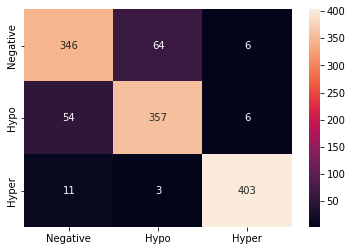

In [ ]:

sn.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='g',xticklabels=["Negative","Hypo","Hyper"],yticklabels=["Negative","Hypo","Hyper"])

## **Deep Learning**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten


In [ ]:
X_train_std.shape

(11248, 12)

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, dtype ="uint8")
test_labels = to_categorical(y_test, dtype ="uint8")

In [ ]:

# define the keras model
model = Sequential()
model.add(Dense(18, input_shape=(12,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_std, train_labels, epochs=15,validation_data=(X_test_std, test_labels), batch_size=10)

Epoch 1/15
1125/1125 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8316 - val_loss: 0.2219 - val_accuracy: 0.9344
Epoch 2/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1360 - accuracy: 0.9643 - val_loss: 0.0908 - val_accuracy: 0.9824
Epoch 3/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0738 - accuracy: 0.9831 - val_loss: 0.0612 - val_accuracy: 0.9880
Epoch 4/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0601 - accuracy: 0.9874 - val_loss: 0.0522 - val_accuracy: 0.9904
Epoch 5/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0543 - accuracy: 0.9884 - val_loss: 0.0481 - val_accuracy: 0.9888
Epoch 6/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0520 - accuracy: 0.9879 - val_loss: 0.0481 - val_accuracy: 0.9888
Epoch 7/15
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0501 - accuracy: 0.9874 - val_loss: 0.0444 - val_accuracy:

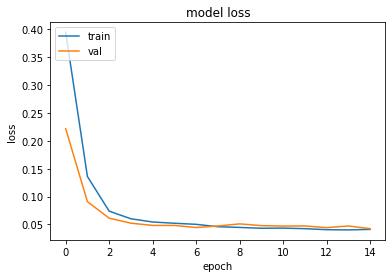

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
...
# evaluate the keras model
_, accuracy = model.evaluate(X_test_std, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

40/40 [==============================] - 0s 925us/step - loss: 0.0395 - accuracy: 0.9920
Accuracy: 99.20


In [ ]:
y_pred = model.predict(X_test_std)

40/40 [==============================] - 0s 870us/step


In [ ]:
y_pred

array([[3.34187818e-04, 5.71253938e-12, 9.99665916e-01],
       [8.98756591e-16, 9.99999940e-01, 0.00000000e+00],
       [1.63172614e-02, 9.83681440e-01, 1.22556855e-06],
       ...,
       [2.22223413e-08, 9.99999940e-01, 1.04506494e-22],
       [3.61979520e-03, 7.40705230e-09, 9.96380270e-01],
       [1.00000000e+00, 1.06542855e-08, 4.00213153e-12]], dtype=float32)

In [ ]:
pred_mod=[]
for i in y_pred:
  pred_mod.append(np.argmax(i))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([416, 417, 417]))

In [ ]:
print(classification_report(y_test, pred_mod ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       416
           1       1.00      0.99      0.99       417
           2       0.99      1.00      0.99       417

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



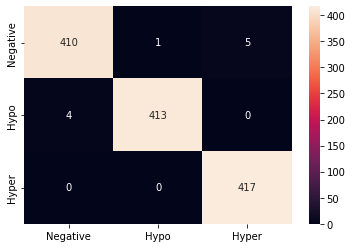

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_mod),annot=True,fmt='g',xticklabels=["Negative","Hypo","Hyper"],yticklabels=["Negative","Hypo","Hyper"])

In [ ]:
model.save("/content/drive/MyDrive/MINI Project/ann-2.h5")